In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd

# Attempt to read the CSV file, skipping problematic rows
try:
    df = pd.read_csv('UScomments.csv', error_bad_lines=False)
    print("File successfully loaded.")
except Exception as e:
    print("Error loading file:", e)


<ipython-input-10-80df93d86d53>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



File successfully loaded.


<ipython-input-10-80df93d86d53>:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv', error_bad_lines=False)


In [11]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [12]:
df.shape

(436207, 4)

In [13]:
df.isnull().sum()

video_id         0
comment_text    10
likes            1
replies          1
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [16]:
from textblob import TextBlob

In [17]:
TextBlob('awesome 😉').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [18]:
TextBlob('bad video').sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [19]:
#df = df[0:10000]

In [20]:
#finding polarity for each comment
polarity = []
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.appendend(0)


In [21]:
# lets post the first 10 polarity values
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [22]:
df['polarity']=polarity

In [23]:
df.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [24]:
positive_polarity = df[df['polarity']==1]

In [25]:
negative_polarity = df[df['polarity']==-1]

In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
negative_polarity['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
435137    This video is insulting, I've always thought I...
435489    WHERE DID COLLEEN GET HER POPSOCKET!!!! I’m ob...
435738                                   Worst advice ever!
435804    When you put even 0.0001 seconds of kpop in a ...
435925                            I'm laughing hysterically
Name: comment_text, Length: 2228, dtype: object

In [28]:
total_negative_comments=" ".join(negative_polarity['comment_text'])

In [29]:
total_negative_comments[0:150]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how"

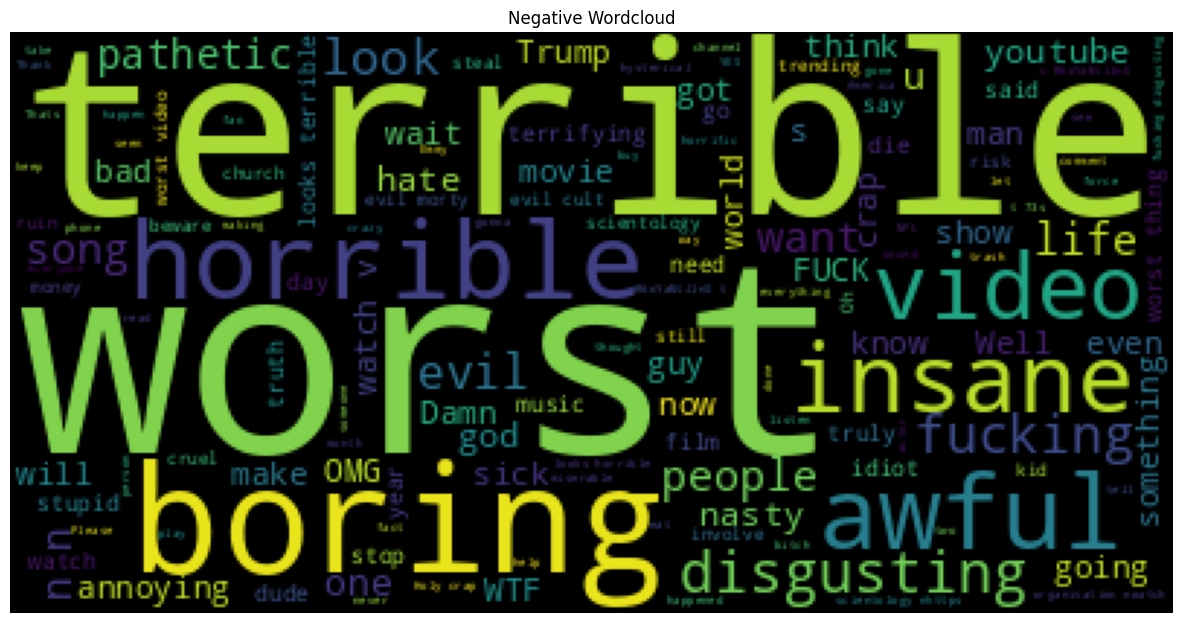

In [30]:
negative_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,10))
plt.title('Negative Wordcloud')
plt.axis('off')
plt.imshow(negative_wordcloud)

In [31]:
total_positive_comments=" ".join(positive_polarity['comment_text'])

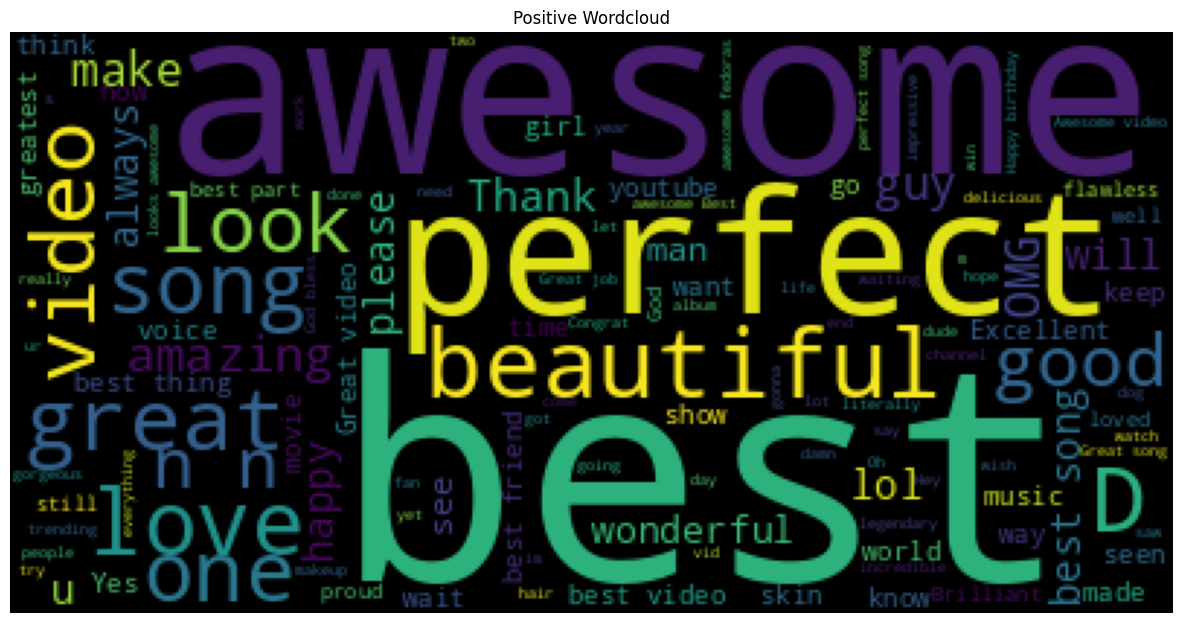

In [32]:
positive_wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize=(15,10))
plt.title('Positive Wordcloud')
plt.axis('off')
plt.imshow(positive_wordcloud)

In [33]:
!pip install emoji==1.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169295 sha256=a0469565a5ad5585dc0763f808010c3b6d54a09c264345099afa6614c0770e8c
  Stored in directory: /root/.cache/pip/wheels/3d/c9/af/02caa5725634f27f4e2e43852f67fc9069d014038b236a827e
Successfully built emoji


In [34]:
import emoji

In [35]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [36]:
print('\U0001F600')

😀


In [37]:
emoji_list = []
for i in df['comment_text']:
    for j in i:
        if j in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(j)

In [38]:
emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [39]:
len(emoji_list)

182183

In [40]:
from collections import Counter

In [41]:
Counter(emoji_list).most_common(10)

[('😂', 23165),
 ('😍', 21691),
 ('❤', 18740),
 ('🔥', 5667),
 ('😭', 5360),
 ('👏', 3525),
 ('👍', 3437),
 ('😘', 3425),
 ('😬', 3284),
 ('💖', 3151)]

In [42]:
emojies = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [43]:
frequency = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [44]:
frequency

[23165, 21691, 18740, 5667, 5360, 3525, 3437, 3425, 3284, 3151]

In [45]:
emojies

['😂', '😍', '❤', '🔥', '😭', '👏', '👍', '😘', '😬', '💖']

In [46]:
pip install plotly

In [47]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [48]:
trace = go.Bar(x=emojies,y=frequency)

In [49]:
iplot([trace])